| ![Logo](images/unilogo.png) |
|----------------------------------------------------------------------------|
| University of Greifswald physics department |

Positrion Lab
===============================================
Authored by: [Nathan Belmore](https://plasma.physics.berkeley.edu/faculty-staff/nathan-belmore) 
In partnership with Tobias Tubandt


# Abstract
***
For this experiment we are measuring the lifetime of a positron. Positrons are the antiparticle of eletrons. We are generating the positrons through $\beta$-decay. They are not isolated from background gases, so the lifetime is just a measurement of the length of time before the positron interacts with an electron in the environment. There is a short lived state called positronium, a pairing of $e^-$ and $e^+$, that we measure as well.

# Physical Principles
***
Positron are the antimatter pair to electrons, which makes them leptons with the same mass, opposite charge and helicity of the electron. When positrons interact with electrons you can measure a matter-antimatter annihilation event. 

## positronium

There is a chance that a positron electron pair can form a short-lived state known as positronium. There are two possible states of positronium, para- and ortho-, which correspond to anti-aligned or aligned spin states of the constituent particles. The lifetime of each state is slightly different. In this experiment, $\beta^+$ decay is the primary channel for positron production. We are using ${^{22}_{11}Na}$, which decays into ${^{22}_{10}Ne}$ (see Fig. 1), which also created a positron and neutron.

| ![Decay](images/fig1.png) |
|----------------------------------------------------------------------------|
| Fig. 1 Decay of ${^{22}_{11}Na}$. [1] |


## Experimental measurement

The primary measurement is done by examining the coincidence measurement of the photon-pair emission from the antimatter annihilation event. The measurement is made by two photo multipliers (PMT) oriented on opposite sides of the positron source. The signal is filtered by the timing circuit, which only accepts measurements within the coincidence window. We expect the characteristic energy peaks that correspond to the two states to be at $511 keV$ and $1275 keV$

One of the properties of energy measurements that much be considered is the Compton edges. When photons scatter off of charged particles this can change the detected energy. If $E$ is the enegry measured at the PMT, $E_{p}$ is the photon energy, $E_0$ is the rest energy of the charged particle, and $\alpha$ is the scattering angle of the photon off the charged particle, we get the following for a scattering angle of $180^{\circ}$, we expect Compton edges at $340 keV$ and $1061 keV$.

# Experimental Setup
***
We are using the Positron Lifetime System (PLS-SYSTEM) Setup from Ortek. Roughly the setup
consist of the 2 PMTs, which are connected through 2 discriminators. Over a time-analog-converter
and a analog-digital-converter the measured data will be displayed at a computer. The setup can be seen in fig. 2. This measurment records a spectrum over a 12h window. From this dataset we want to calculate the lifespan of the positron.

| ![Experimental Setup](images/fig2.png) |
|----------------------------------------------------------------------------|
| Fig. 2 Experimental configuration. [1] |

# Analysis
***



In [2]:
# creating the correct enviroment for analysis
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit
from scipy import stats
from scipy.signal import argrelextrema, savgol_filter
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

## Importing the data

Below the two plots are to verify the data looks correct and and imported properly. Labels were omitted but will be included on all relevant plots. 

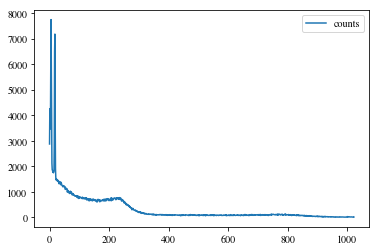

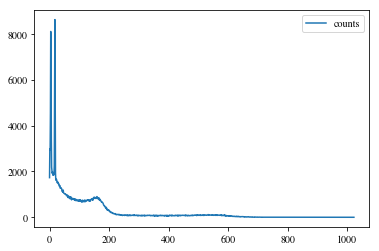

In [45]:
step3start = pd.read_csv('data/step3.Spe', engine='python', header=11, skipfooter=14, names=['counts'])
step3stop = pd.read_csv('data/step3STOP.Spe', engine='python', header=11, skipfooter=14, names=['counts'])
step4start = pd.read_csv('data/step4start.Spe', engine='python', header=11, skipfooter=14, names=['counts'])
step4stop = pd.read_csv('data/step4stop.Spe', engine='python', header=11, skipfooter=14, names=['counts'])
step5 = pd.read_csv('data/step5TimingCalibration.Spe', engine='python', header=11, skipfooter=14, names=['counts'])
step6 = pd.read_csv('data/step6_12h.Spe', engine='python', header=11, skipfooter=14, names=['counts'])

step3start.plot()
step3stop.plot();

## Finding peaks for energy calibration

The first measurements are done with the start and stop signal. The 2 datasets are used to do an energy calibration, assuming we are measuring the $\beta+$ decay, we should get peaks at $511 \text{ keV}$, $546 \text{ keV}$, $1275 \text{ keV}$ and $1820 \text{ keV}$. Our characteristic peaks we want to identify are the $511 \text{ keV}$ and $1275 \text{ keV}$ ones.

/home/natephysics/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


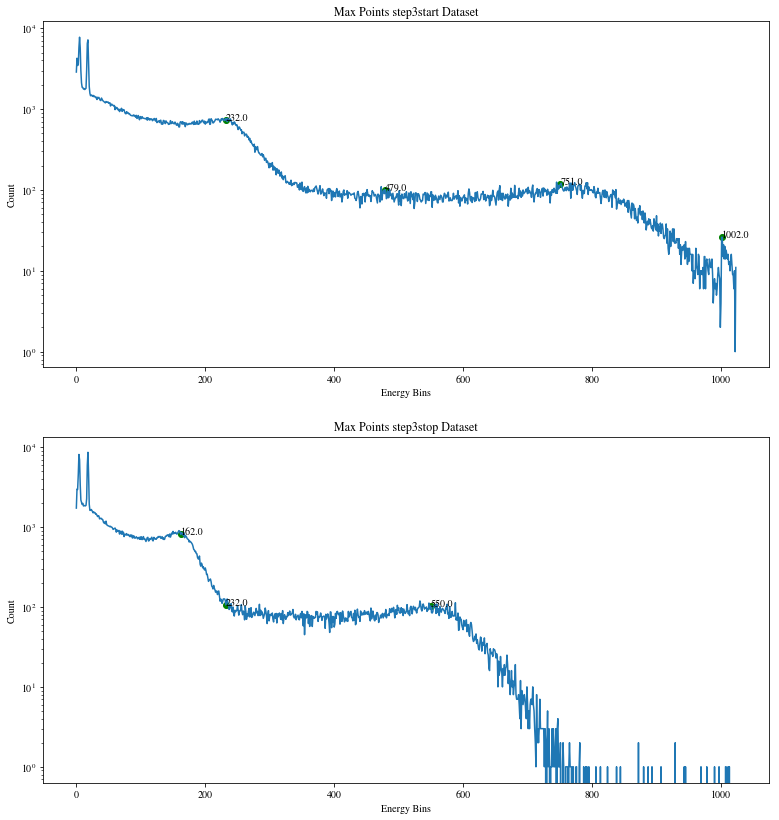

In [4]:
# Smoothing the data set to help with peak finding
step3startsmoothed = savgol_filter(step3start['counts'].apply(np.log).values, 5, 3) # window size 7, polynomial order 3
step3stopsmoothed = savgol_filter(step3start['counts'].apply(np.log).values, 5, 3) # window size 7, polynomial order 3

# Find local peaks
max1 = step3start.iloc[argrelextrema(step3startsmoothed, np.greater_equal, order=60)]
max2 = step3stop.iloc[argrelextrema(step3stopsmoothed, np.greater_equal, order=20)]

# Dropping peaks below 20 counts
max1 = max1[max1['counts'].between(0, 1200)]
max2 = max2[max2['counts'].between(100, 5000)]

# Plot results
fig, ax = plt.subplots(2, 1, figsize=(13, 14))
ax[0].set_title('Max Points step3start Dataset') 
ax[0].set_xlabel('Energy Bins')
ax[0].set_ylabel('Count')
ax[0].set_yscale("log", nonposy='clip')
ax[0].scatter(max1.index.values, step3start['counts'].iloc[max1.index.values], c='g')
ax[0].plot(step3start.index.values, step3start['counts'])


ax[1].set_title('Max Points step3stop Dataset') 
ax[1].set_xlabel('Energy Bins')
ax[1].set_ylabel('Count')
ax[1].set_yscale("log", nonposy='clip')
ax[1].scatter(max2.index.values, step3stop['counts'].iloc[max2.index.values], c='g')
ax[1].plot(step3stop.index.values, step3stop['counts'])


# Add labels to points
for i in max1.index.values:
    ax[0].annotate(format(step3start.index[i], '.1f'), (step3start.index[i], step3start['counts'][i]))

for i in max2.index.values:
    ax[1].annotate(format(step3stop.index[i], '.1f'), (step3stop.index[i], step3stop['counts'][i]))
plt.show()

In the first plot we expect the first labeled peak to be the Compton edge for the $511$ keV peak, so $546$ keV. In the second data set we expect the last labeled peak to be the Conpton edge of the $1275$ keV peak. Which gives us a value of:

Peak 1 (546 keV): bin# 232   
Peak 2 (1820 keV): bin# 550 

Unfortunately, we were unable to get a proper calibration of the energy axis using these data points. We will continue to work with the binned axis going forward. 

### Filtering the start and stop signal

We truncated the windows to use the signal as our stop and start times. Below are the plots of the truncated windows.

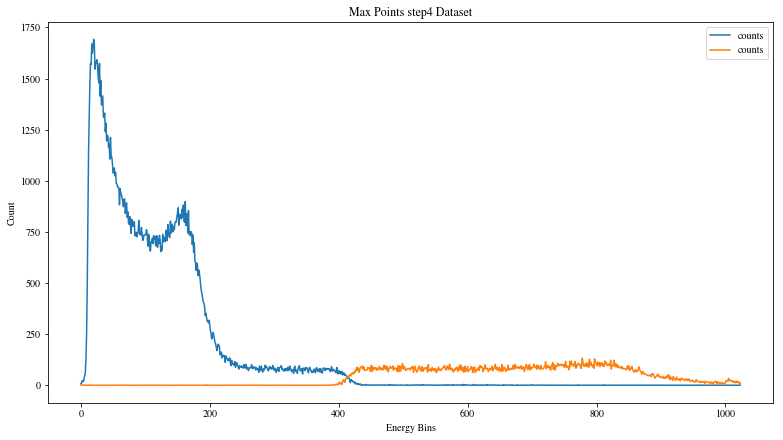

In [29]:
# Plotting the two data sets
fig, ax = plt.subplots(figsize=(13, 7))
ax.set_title('Max Points step4 Dataset') 
ax.set_xlabel('Energy Bins')
ax.set_ylabel('Count')

#Plotting Step 4 stop
step4stop.plot(ax=ax)
step4start.plot(ax=ax)

## Finding peaks for time calibration

We took 5 second long datasets spaced out by increasing the delay in 4 nanosecond steps for 16 steps. We are using this to preform a time calibration. First, we used a linear peak finder to get the values of the peaks. 

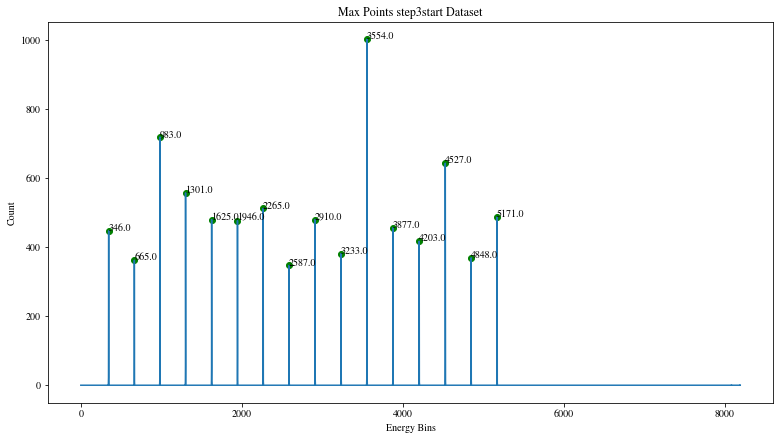

Table of peak index values and their counts:


,counts
346,447
665,362
983,719
1301,557
1625,480
1946,477
2265,512
2587,347
2910,480
3233,381


In [12]:
# Find local peaks
max1 = step5.iloc[argrelextrema(step5['counts'].values, np.greater_equal, order=60)]

# Dropping peaks below 20 counts
max1 = max1[max1['counts'].between(200, 1200)]

# Plot results
fig, ax = plt.subplots(figsize=(13, 7))
ax.set_title('Max Points step3start Dataset')
ax.set_xlabel('Energy Bins')
ax.set_ylabel('Count')
ax.scatter(max1.index.values, step5['counts'].iloc[max1.index.values], c='g')
ax.plot(step5.index.values, step5['counts'])

# Add labels to points
for i in max1.index.values:
    ax.annotate(format(step5.index[i], '.1f'), (step5.index[i], step5['counts'][i]))
plt.show()
print('Table of peak index values and their counts:')
max1

Now we can calculate the difference in the peak centroids and the deviation from the mean peak value. 

In [14]:
# Calculating the difference between centroids for the peaks.
diff = max1.iloc[1:].index.values - max1.iloc[:-1].index.values
diff

# Calculating the variation from the mean peak value.
mean = np.mean(diff)

print('Mean value of the difference in peaks: %f' % mean)

Mean value of the difference in peaks: 321.666667


In a 4 nanosecond window there are around 331.67. We can create a function to convert the bin values to time intervals. 

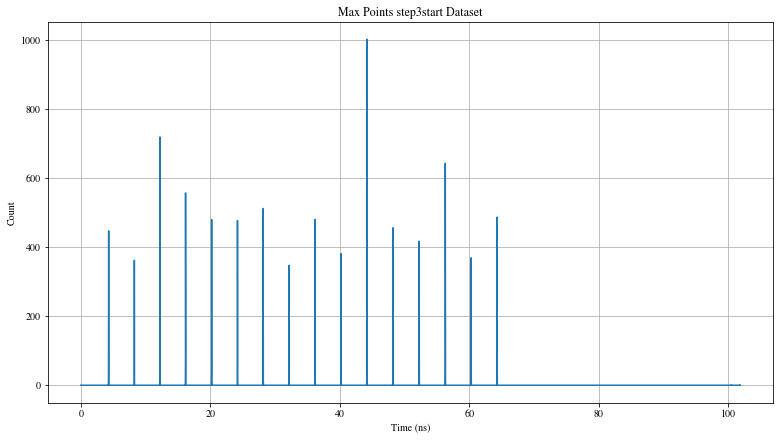

In [56]:
# Function we are interested in fitting
def rescale(x):
    return x * (4/mean)

# Rescaling the axis
step5['time'] = rescale(step5.index.values)

# Fitting and plotting the results
fig, ax = plt.subplots(figsize=(13, 7))
ax.set_title('Max Points step3start Dataset')
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Count')
ax.grid(True)
ax.plot(step5['time'], step5['counts'])

Above we can see the time calibration to be mostly in sync with the expected values. 

### Fitting the peak

In step 6 we've collected counts overnight and we are fitting the results to an exponential decay to calculate the time constant, or the half-life of the positrons in the trap. 

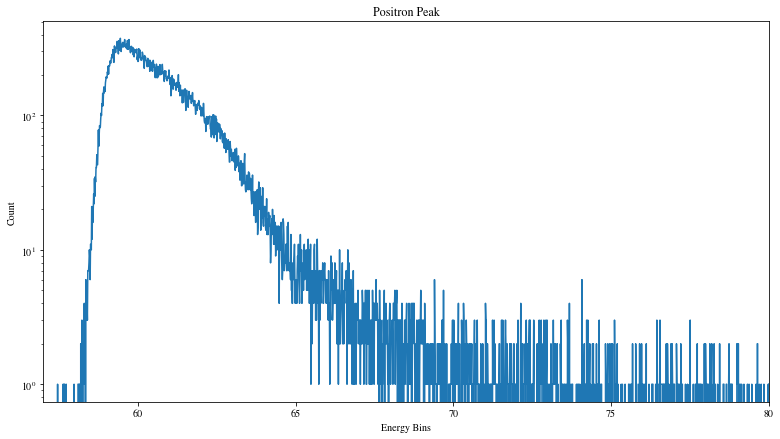

In [55]:
# Rescaling the axis
step6['time'] = rescale(step6.index.values)

# Plotting Step 6 timing calibration
fig, ax = plt.subplots(figsize=(13, 7))
ax.set_title('Positron Peak') 
ax.set_xlabel('Time (ns)')
ax.set_xlim([57, 80])
ax.set_ylabel('Count')
ax.set_yscale("log", nonposy='clip')
ax.plot(step6['time'], step6['counts'])

Our expected time constant = 1.874548 ns


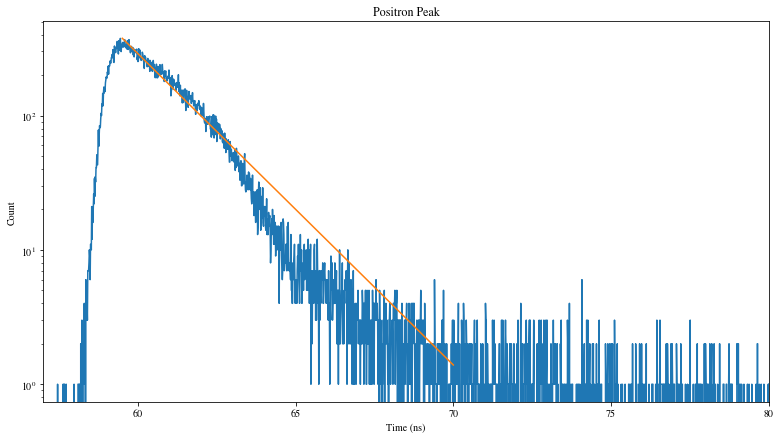

In [230]:
# Define the fit function.
def expfun(x, alpha, beta):
    return alpha * np.exp(beta * x)

p0 = [1000, -0.0001]

# Fitting the region 59.5-62.7
xfit = step6[(step6['time'] < 70) & (step6['time'] > 59.5)]['time']
yfit = step6[(step6['time'] < 70) & (step6['time'] > 59.5)]['counts']
popt, _ = curve_fit(expfun, xfit, yfit, p0=p0)

#Plotting Step 6 timing calibration
fig, ax = plt.subplots(figsize=(13, 7))
ax.set_title('Positron Peak') 
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Count')
ax.set_xlim([57, 80])
ax.set_yscale("log", nonposy='clip')
ax.plot(step6['time'], step6['counts'])
ax.plot(xfit, expfun(xfit, *popt))
# ax.plot(xfit2, expfun(xfit2, *popt2))
tau = -1/popt[1]
print('Our expected time constant = %f ns' % tau)

We get a measured value of $\alpha = 2.29*10^{16}$ and $\beta = -5.33*10^{-1}$, with a calculated $\tau = 1.874548 ns$. We wanted to fit two exponentials to the two regions of the data but the second region turns out difficult to get a fit to converge for and because we are limited on time we decided to stick with one fit region. 

## Discussion and Conclusion
***
During this lab we constructed an energy calibration that didn't quite work out. We calculated a nice time calibration. While we did calculate an estimate of $\tau$, we're unsure if the value can be trusted because the fit region isn't ideal and even the data set has unexpected behavior with the slope actually increasing over an interval. Overall the lab is a bit of a mess, with the measurements not as expected, the lab manual not very clear, and the results questionable at best. 